<a href="https://colab.research.google.com/github/jrbobes/jrbobes-hitl-ml/blob/master/PAAD_DecissionTree_Treatment_type.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PAAD - DecissionTree - Treatment type
author: jose.bobes at udc.es



In [89]:
# Importing Required Libraries

import sys
print('Python: {}'.format(sys.version))

import scipy
print('scipy: {}'.format(scipy.__version__))

import numpy
print('numpy: {}'.format(numpy.__version__))

import matplotlib.pyplot as plt
print('matplotlib: {}'.format(matplotlib.__version__))

import pandas as pd
print('pandas: {}'.format(pandas.__version__))

import sklearn
print('sklearn: {}'.format(sklearn.__version__))

from sklearn import tree
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz

Python: 3.7.15 (default, Oct 12 2022, 19:14:55) 
[GCC 7.5.0]
scipy: 1.7.3
numpy: 1.21.6
matplotlib: 3.2.2
pandas: 1.3.5
sklearn: 1.0.2


In [90]:
# Loading Data
url = "https://raw.githubusercontent.com/jrbobes/jrbobes-hitl-ml/master/clinical.tsv"
columns = ['case_id','gender', 'race', 'age_at_index', 'ajcc_pathologic_t', 'ajcc_pathologic_n', 'ajcc_pathologic_m', 'treatment_type', 'ajcc_pathologic_stage', 'vital_status', 'days_to_death']
dataset = pd.read_csv(url, sep='\t', usecols=columns)

print(dataset.shape)
print(dataset.head())

(370, 11)
                                case_id  age_at_index days_to_death  gender  \
0  cfda26b9-d417-425c-9a72-fa76ca4b296c            76           '--    male   
1  cfda26b9-d417-425c-9a72-fa76ca4b296c            76           '--    male   
2  712c2f78-c736-42ce-b689-a954c5290987            57           250    male   
3  712c2f78-c736-42ce-b689-a954c5290987            57           250    male   
4  2aaf212f-000a-4a9d-8a4a-198fa94f491e            55           '--  female   

    race vital_status ajcc_pathologic_m ajcc_pathologic_n  \
0  white        Alive                M0                N1   
1  white        Alive                M0                N1   
2  white         Dead                MX                N1   
3  white         Dead                MX                N1   
4  white        Alive                M0                N0   

  ajcc_pathologic_stage ajcc_pathologic_t               treatment_type  
0             Stage IIB                T2       Radiation Therapy, NOS  
1 

In [91]:
# Feature Selection
# Split dataset in features and target variables (REF: https://www.datacamp.com/tutorial/decision-tree-classification-python)
feature_cols = ['gender', 'race', 'age_at_index', 'ajcc_pathologic_t', 'ajcc_pathologic_n', 'ajcc_pathologic_m', 'ajcc_pathologic_stage']
X = dataset[feature_cols] # Features
X_encoded = pd.get_dummies(X)
y = dataset.treatment_type # Target variable

In [92]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [93]:
# Building Decision Tree Model

# Create Decision Tree classifer object
clf = tree.DecisionTreeClassifier(max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [94]:
# Evaluating Model
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.44144144144144143


In [95]:
# Optimizing the accuracy

best_acc = 0

for criterion in "gini", "entropy":
    for max_depth in [2,3,4,5,6,10]:
        for min_samples_leaf in [2, 5, 10, 20, 30]:
            dtree = tree.DecisionTreeClassifier(max_depth=max_depth, criterion=criterion, min_samples_leaf=min_samples_leaf)
            dtree.fit(X_train, y_train)
            predicitions = dtree.predict(X_test)
            acc = metrics.accuracy_score(y_test, predicitions)
            if acc > best_acc:
                best_params = f"criterion: {criterion}, max_depth: {max_depth}, min_samples_leaf: {min_samples_leaf}"
                best_acc = acc

print("Accuracy: ", best_acc)
print("Params: ", best_params)

Accuracy:  0.4594594594594595
Params:  criterion: gini, max_depth: 2, min_samples_leaf: 2


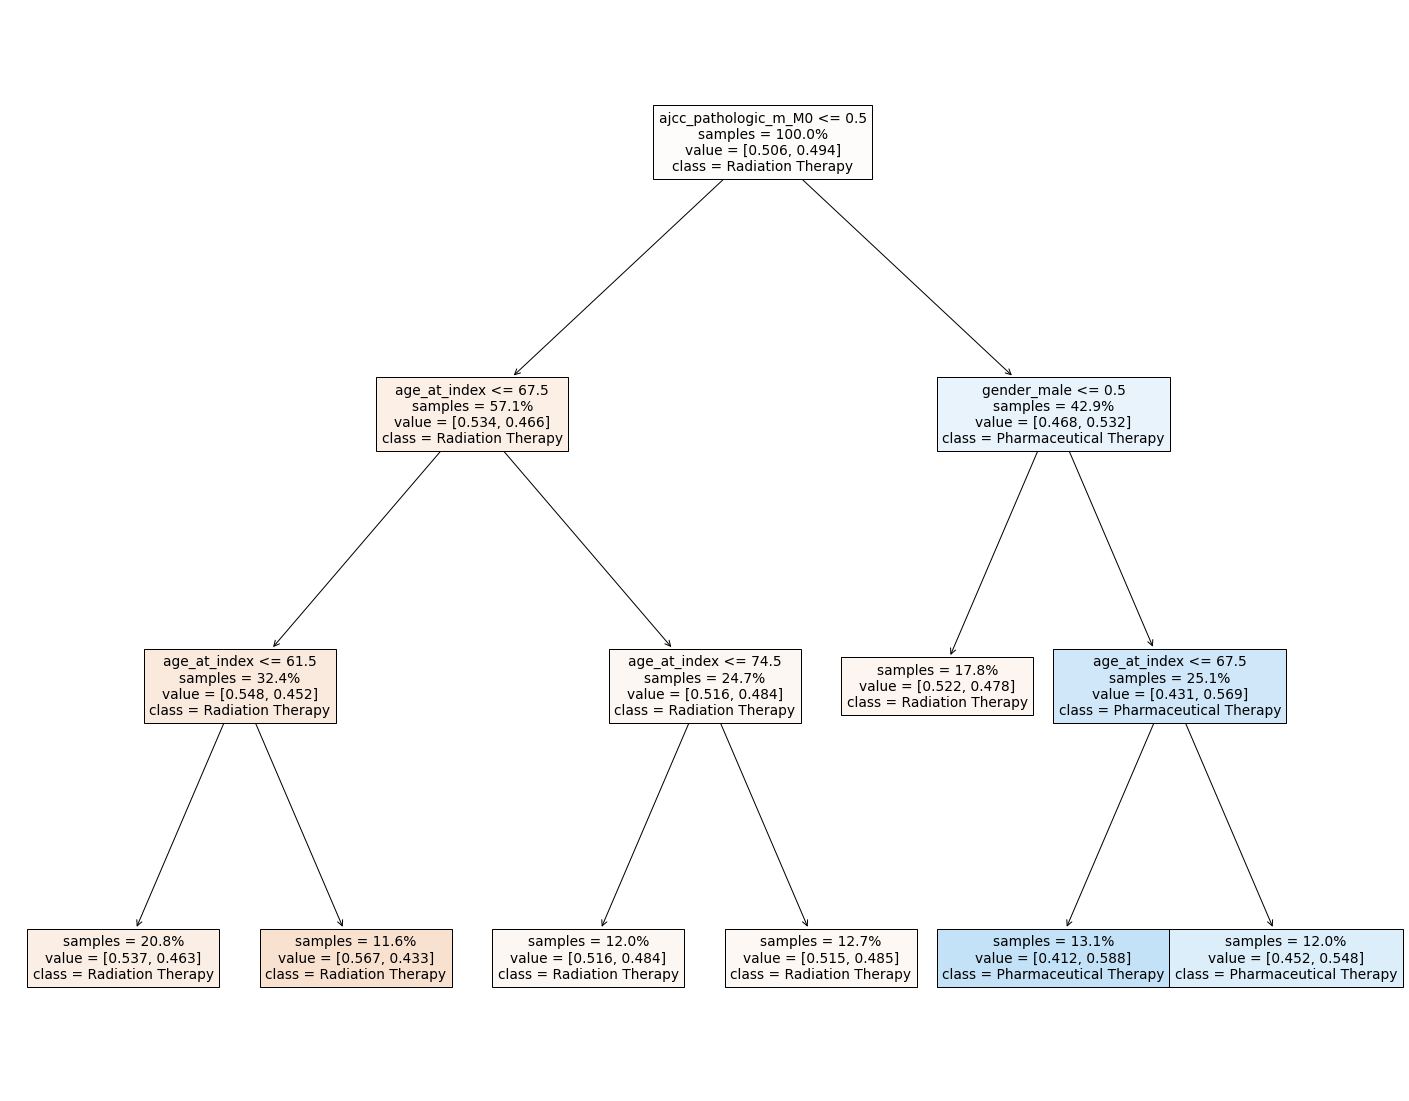

In [96]:
# Visualizing the decision tree

fig = plt.figure(figsize=((25,20)))
plot_tree(dtree,
            feature_names = X_encoded.columns,
            class_names=['Radiation Therapy', 'Pharmaceutical Therapy'], 
            impurity=False,
            proportion=True,
            filled=True)
fig.savefig('test.png')